## Clustering Demonstration
We will use k-means clustering to show how clustering works, though several other clustering methods exist. The key hyper-parameter associated with k-means is the value $k$ which specifies the number of clusters.

In [1]:
import numpy as np
from scipy.io import loadmat
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
%matplotlib inline

#### Simple k-Means Demo
We first generate some data with four known clusters

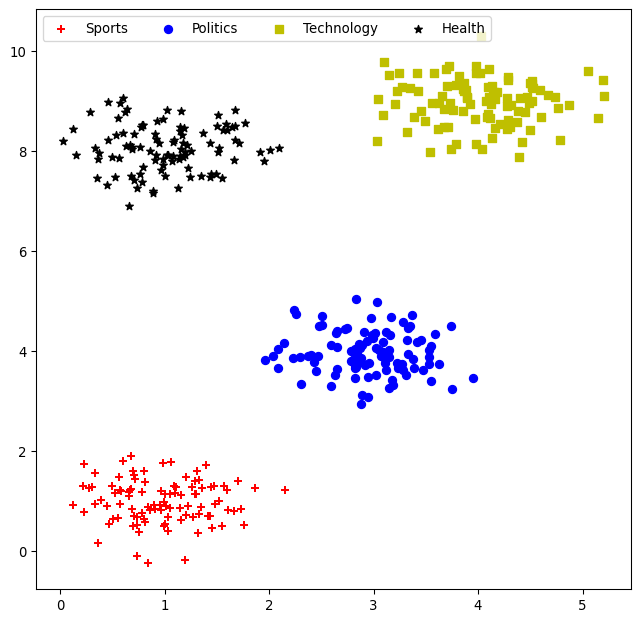

In [2]:
sigma = np.array([[0.2,0],[0,0.2]])
n = 100
mu1 = np.array([1,1])
mu2 = np.array([3,4])
mu3 = np.array([4,9])
mu4 = np.array([1,8])
x11 = np.random.multivariate_normal(mu1,sigma,n)
x15 = np.random.multivariate_normal(mu2,sigma,n)
x51 = np.random.multivariate_normal(mu3,sigma,n)
x55 = np.random.multivariate_normal(mu4,sigma,n)

X = np.vstack([x11,x15,x51,x55])
y = np.zeros([4*n,1])
y[n:2*n] = 1
y[2*n:3*n] = 2
y[3*n:4*n] = 3
fig = plt.figure(num=None, figsize=(8, 8), dpi=96, facecolor='w', edgecolor='k')
plt.scatter(X[np.where(y == 0)[0],0],X[np.where(y == 0)[0],1],c='r',marker='+')
plt.scatter(X[np.where(y == 1)[0],0],X[np.where(y == 1)[0],1],c='b',marker='o')
plt.scatter(X[np.where(y == 2)[0],0],X[np.where(y == 2)[0],1],c='y',marker='s')
plt.scatter(X[np.where(y == 3)[0],0],X[np.where(y == 3)[0],1],c='k',marker='*')

plt.legend(['Sports','Politics','Technology','Health'],ncol=4,loc=2)

Stack all data together and select four random cluster centers

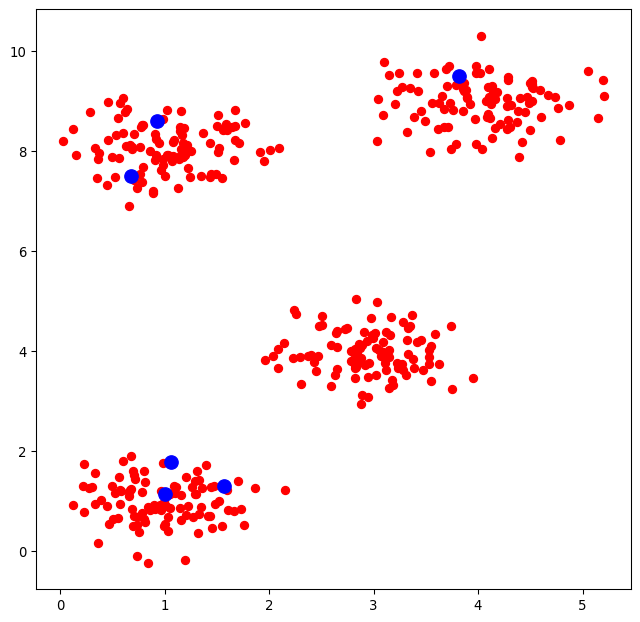

In [8]:
k = 6;
r = np.random.permutation(X.shape[0]);
init_centroids = X[r[0:k],:]
fig = plt.figure(num=None, figsize=(8, 8), dpi=96, facecolor='w', edgecolor='k')
plt.scatter(X[:,0],X[:,1],c='r')
plt.scatter(init_centroids[:,0],init_centroids[:,1],c='b',marker='o',s=100)


Assign points to the closest cluster and recompute centroids. Iterate until converged. Notice how quickly k-means converges regardless of the initial conditions. However, this might not always be true.

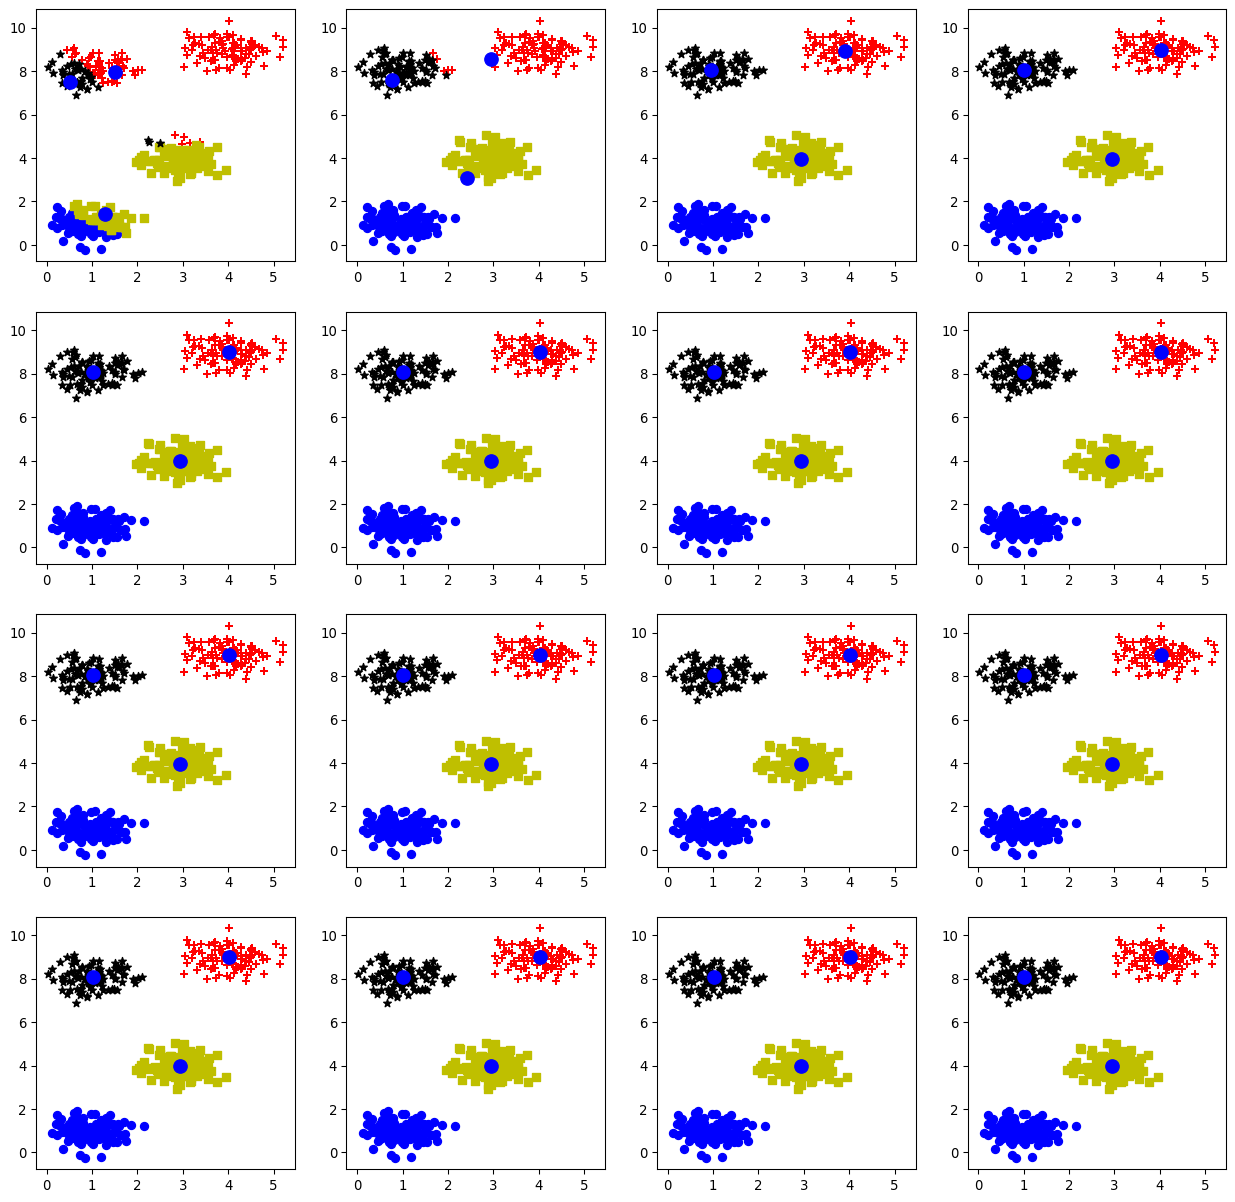

In [7]:
centroids = init_centroids
fig = plt.figure(num=None, figsize=(16, 16), dpi=96, facecolor='w', edgecolor='k')
for iters in range(16):
    distances = np.zeros((X.shape[0],k))
    for i in range(k):
        for j in range(X.shape[0]):
            distances[j,i] = np.sqrt(np.sum((X[j,:] - centroids[i,:])**2))
    assigned_cluster = np.argmin(distances,axis=1) 
    ax = fig.add_subplot(4,4,iters+1)

    ax.scatter(X[np.where(assigned_cluster == 0)[0],0],X[np.where(assigned_cluster == 0)[0],1],c='r',marker='+')
    ax.scatter(X[np.where(assigned_cluster == 1)[0],0],X[np.where(assigned_cluster == 1)[0],1],c='b',marker='o')
    ax.scatter(X[np.where(assigned_cluster == 2)[0],0],X[np.where(assigned_cluster == 2)[0],1],c='y',marker='s')
    ax.scatter(X[np.where(assigned_cluster == 3)[0],0],X[np.where(assigned_cluster == 3)[0],1],c='k',marker='*')
    ax.scatter(centroids[:,0],centroids[:,1],c='b',marker='o',s=100)

    # recompute centroids
    for i in range(k):
        centroids[i,:] = np.mean(X[np.where(assigned_cluster == i)[0],:],axis=0)

### k-Means on Handwritten Digit Recognition Data
We can use k-means on the data that we have used for programming assignment 1

In [10]:
mat = loadmat('mnist_all.mat') 
alltraindata = mat.get('train0')
for i in range(1,10):
    m = mat.get('train'+str(i))
    alltraindata = np.vstack((alltraindata,m))
alltraindata = np.array(alltraindata,dtype=float)
X = scale(alltraindata)

In [11]:
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
#s = np.random.permutation(X.shape[0])
#kmeans.fit(X[s[0:10000],:])
kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

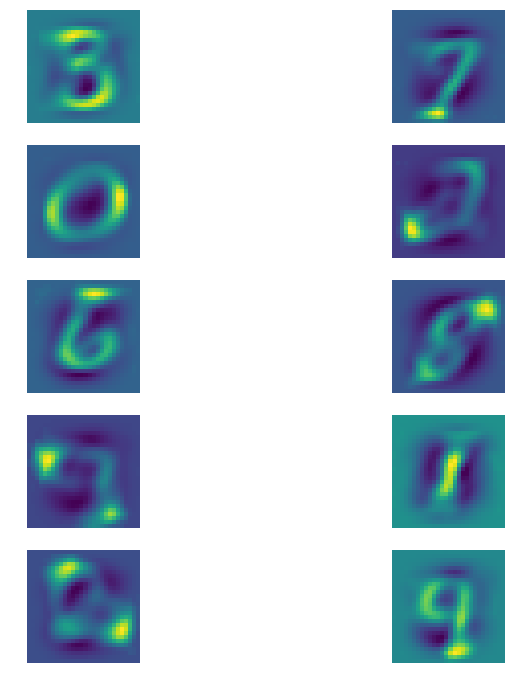

In [12]:
#plot the centroids
fig = plt.figure(figsize=(12,12))
for i in range(10):
    plt.subplot(5,2,i+1)
    row = kmeans.cluster_centers_[i,:]
    # note that each row is a flattened image
    # we first reshape it to a 28x28 matrix
    plt.imshow(np.reshape(row,((28,28))))
    plt.axis('off')